In [14]:
import numpy as np
from six.moves import cPickle as pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def unpickle(file):
    # Load pickled data
    fo = open(file, 'rb')
    dict = pickle.load(fo) 
    fo.close()
    return dict

In [27]:
def rescale(img):
    min_array = 0.*np.ones_like(img)
    max_array = 1.*np.ones_like(img)
    img_recenter = 255.* (img - min_array)/(max_array - min_array)
    return img_recenter.astype('uint8')

In [43]:
def plot_loss(record):
    G_loss = record['Grcd']
    D_loss = record['Drcd']
    epoches = np.array(range(G_loss.shape[0]))
    plt.plot(epoches, G_loss, label='Generator Loss')
    plt.plot(epoches, D_loss, label='Discriminator Loss')
    plt.xlim([0, G_loss.shape[0]+3])
    plt.legend(loc='upper right')
    plt.show()

In [47]:
def plot_pred_acc(record):
    src_pred = rcd['src_pred']
    cls_pred = rcd['cls_pred']
    src_pred_fake_in = src_pred['fake_in']
    src_pred_real_in = src_pred['real_in']
    cls_pred_fake_in = cls_pred['fake_in']
    cls_pred_real_in = cls_pred['real_in']
    epoches = np.array(range(src_pred_fake_in.shape[0]))
    plt.subplot(211)
    plt.plot(epoches, src_pred_fake_in, label='Source Prediction - fake input')
    plt.plot(epoches, src_pred_real_in, label='Source Prediction - real input')
    plt.legend(loc='lower right'); 
    plt.ylim([0., 1.1]);plt.show();
    plt.subplot(212)
    plt.plot(epoches, cls_pred_fake_in, label='Class Prediction - fake input')
    plt.plot(epoches, cls_pred_real_in, label='Class Prediction - real input')
    plt.legend(loc='lower right')
    plt.ylim([0., 1.1]); plt.show()

In [54]:
samples = rcd['img_rcd'][-1]['Xreal']

In [58]:
sample = samples[0,:,:,:]

In [77]:
def visualize(record, num):
    images = record['img_rcd'][num]
    xreal = images['Xreal']
    xfake = images['generated']
    sampler0 = rescale(xreal[0,:,:,:])
    samplef0 = rescale(xfake[0,:,:,:])
    mid = int(xreal.shape[0]/2)
    sampler1 = rescale(xreal[mid,:,:,:])
    samplef1 = rescale(xfake[mid,:,:,:])
    sampler2 = rescale(xreal[-1,:,:,:])
    samplef2 = rescale(xfake[-1,:,:,:])
    plt.subplot(321)
    plt.imshow(sampler0)
    plt.subplot(322)
    plt.imshow(samplef0)
    plt.subplot(323)
    plt.imshow(sampler1)
    plt.subplot(324)
    plt.imshow(samplef1)
    plt.subplot(325)
    plt.imshow(sampler2)
    plt.subplot(326)
    plt.imshow(samplef2)

**Record 3** add dropout

In [16]:
rcd = unpickle("train_rcd/rcd3")

In [17]:
rcd.keys()

['src_pred', 'Grcd', 'Drcd', 'img_rcd', 'cls_pred']

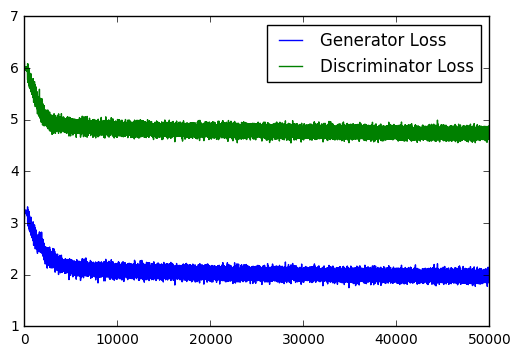

In [84]:
plot_loss(rcd)

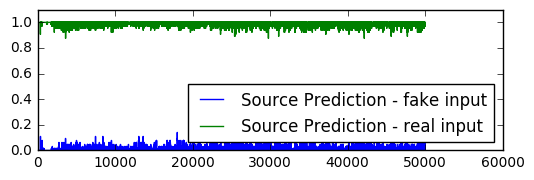

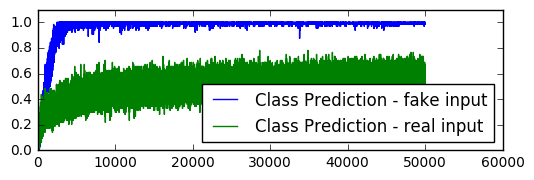

In [48]:
plot_pred_acc(rcd)

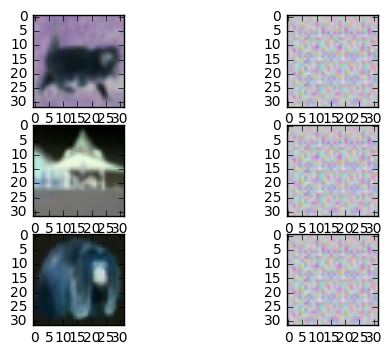

In [79]:
visualize(rcd, 0)

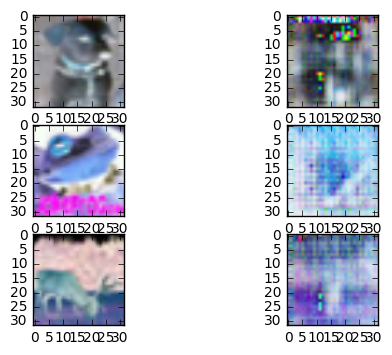

In [78]:
visualize(rcd, -1)

**Record2** without Dropout

In [39]:
rcd2 = unpickle("train_rcd/rcd2")

In [40]:
rcd2.keys()

['src_pred', 'Grcd', 'Drcd', 'img_rcd', 'cls_pred']

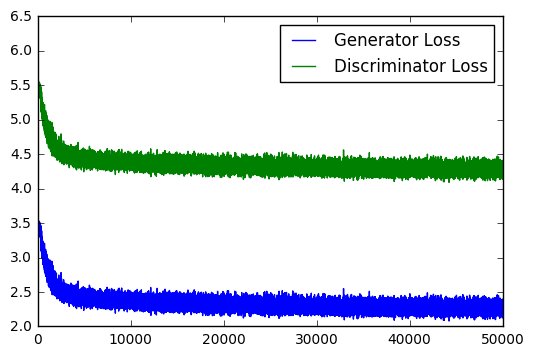

In [51]:
plot_loss(rcd2)

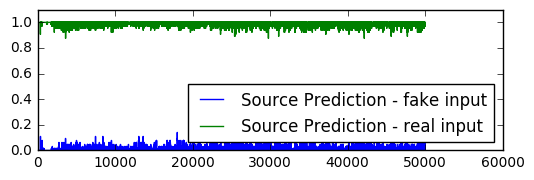

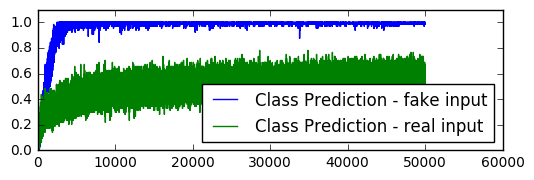

In [52]:
plot_pred_acc(rcd2)

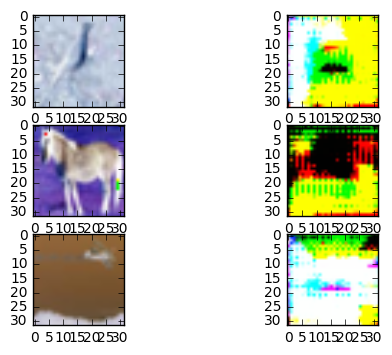

In [53]:
visualize(rcd2)